# **1. Initialization & Case Problem**

 ## 1.1 Library & Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import skew
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score

## 1.2 Data Loading

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
pd.set_option('display.max_columns', None)

#handle understaning missing value
missing_values = ['na', "NA", 'NaN','-']

rideshare_df = pd.read_csv('rideshare_kaggle.csv', na_values=missing_values)
rideshare_df.head().T

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952608.0,1543284024.0,1543366822.0,1543553583.0,1543463360.0
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,12/16/2018 9:30,11/27/2018 2:00,11/28/2018 1:00,11/30/2018 4:53,11/29/2018 3:49
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [4]:
#cek baris dan kolom
baris,kolom = rideshare_df.shape
print('Dataset ini terdapat: ')
print(baris, 'baris')
print(kolom, 'kolom')

Dataset ini terdapat: 
693071 baris
57 kolom


In [5]:
#cek nama kolom
rideshare_df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
#Melihat informasi tipe data pada setiap kolom
rideshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
# Melihat statistik deskriptif dari data
rideshare_df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544049e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,7.056569e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

## 1.3 Case Problem

Berikut ini adalah masalah/keperluan yang ingin diselesaikan menggunakan Linear Regression.

***Karena kompetisi antara Lyft dan Uber sudah mulai membudaya dalam masyarakat, salah satu ide bisnis yang menjanjikan adalah aplikasi yang dapat memprediksi harga pada Lyft dan Uber berdasarkan waktu, jarak dan cuaca dan memberikan pilihan rekomendasi berdasarkan harga terbaik. Maka dari itu, akan dibuat model menggunakan regresi linear yang dapat merekomendasikan Uber daripada Lyft berbasiskan 'price' dari model yang belajar menggunakan data set yang telah disediakan.***

# **2. Exploratory Data Analysis**

## 2.1 General Data Analysis

In [8]:
rideshare_df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544049e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,7.056569e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [9]:
eda_df = rideshare_df.copy()

# mengambil data dari yang belum diencoding
eda_df = eda_df[['source', 'destination', 'cab_type', 'product_id', 'name',
                       'price', 'distance', 'surge_multiplier', 'latitude', 'short_summary']]

#kelompokan data berdasarkan cab_type
uber_data = eda_df[eda_df['cab_type']=='Uber']
lyft_data = eda_df[eda_df['cab_type']=='Lyft']

1. Bagaimana korelasi antara kolom distance, surge multiplier, price pada data uber dan lyft?

Text(0.5, 1.0, 'Lyft : Distance - Price')

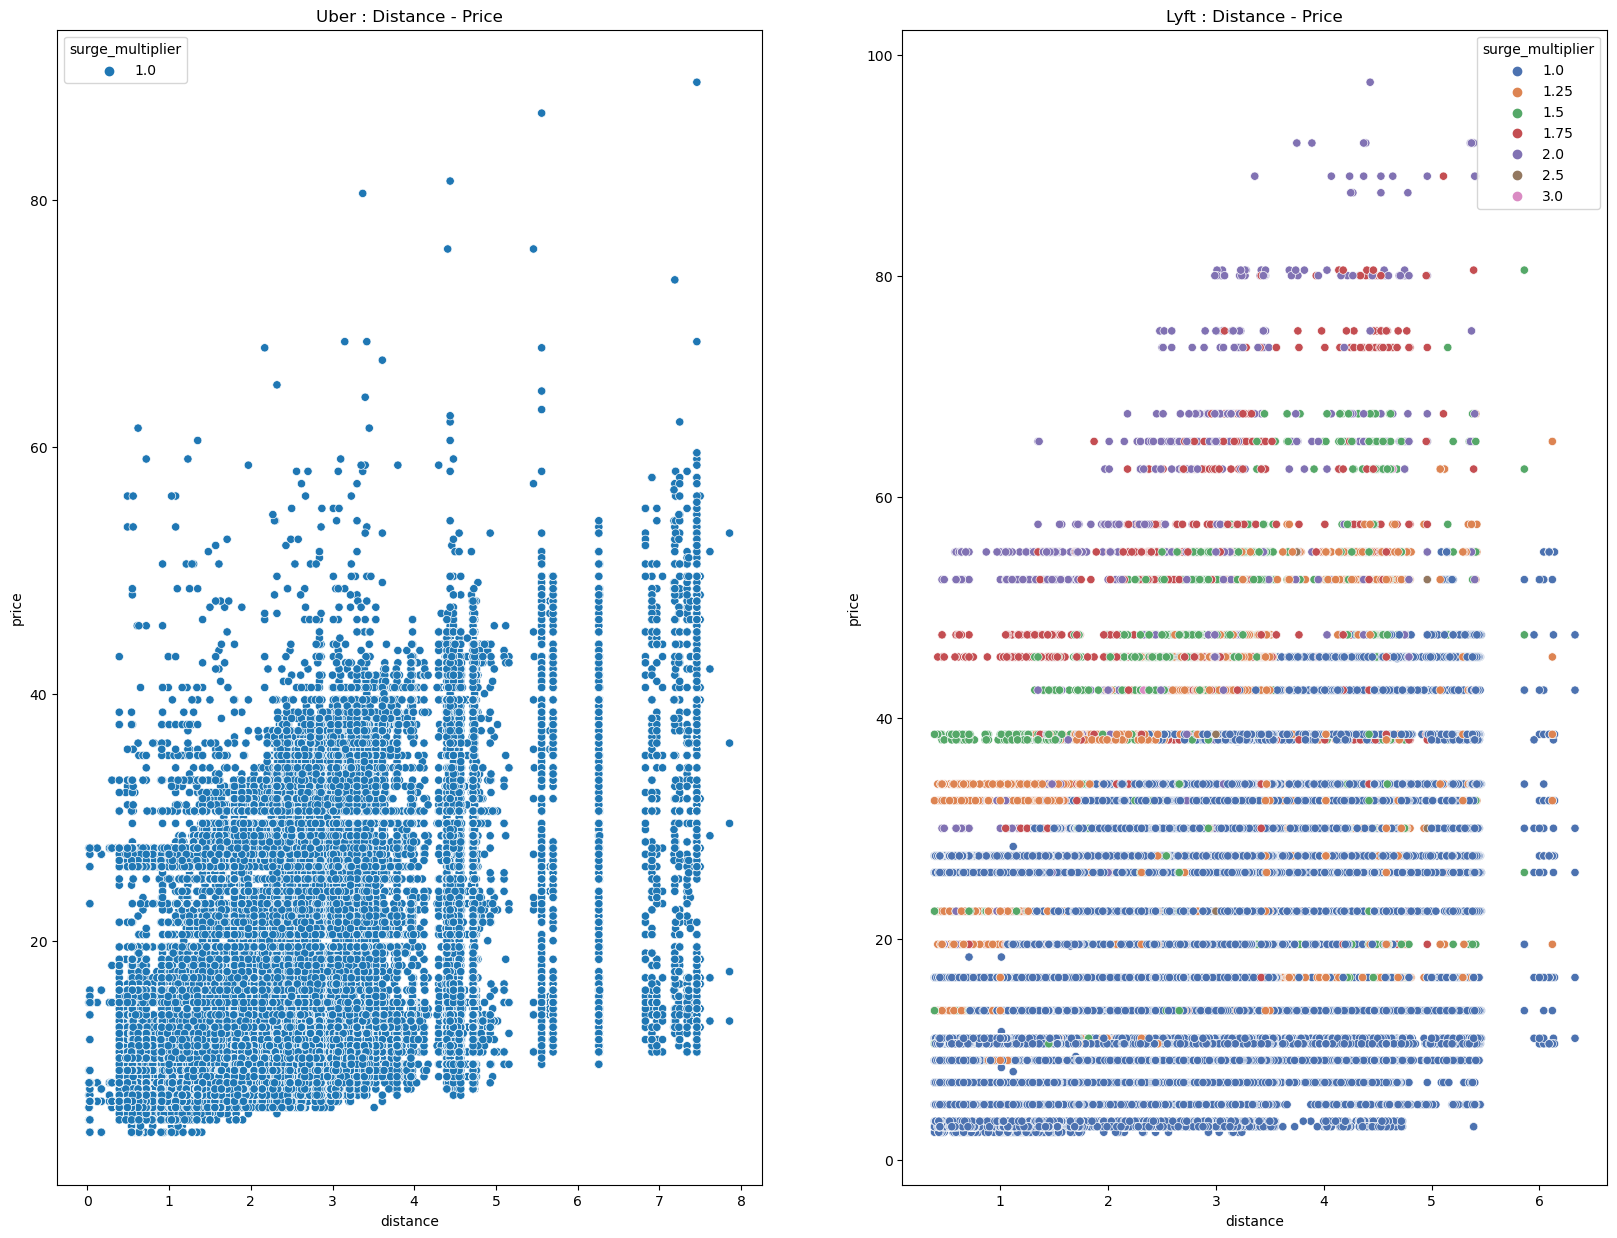

In [10]:
uber_sm_dis_price = uber_data[['distance','surge_multiplier','price']]
lyft_sm_dis_price = lyft_data[['surge_multiplier','distance','price']]

# plotting menggunakan scatter plot
plt.figure(figsize=(20,15))
plt.subplot(121)
sns.scatterplot(data = uber_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier').set_title("Uber : Distance - Price")

plt.subplot(122)
sns.scatterplot(data = lyft_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier', palette='deep').set_title("Lyft : Distance - Price")


Dari visualisasi untuk data uber diatas dapat dilihat bahwa distance dan price tidak memiliki korelasi yang kuat, price tidak bertambah secara linier. sedangkan pada data lyft ketika distance bertambah, harga ikut bertambah. dapat dilihat juga bahwa dengan harga tertinggi, lebih banyak surge multiplier yang juga bertambah

2. Apa lima data asal-tujuan teratas dan jumlah perjalanan pada Uber?

C:\Users\hp\AppData\Local\Temp\ipykernel_5776\1498874166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_top5["Source - Destination"] = uber_new_data["source"].astype(str) + " - " + uber_new_data["destination"].astype(str)


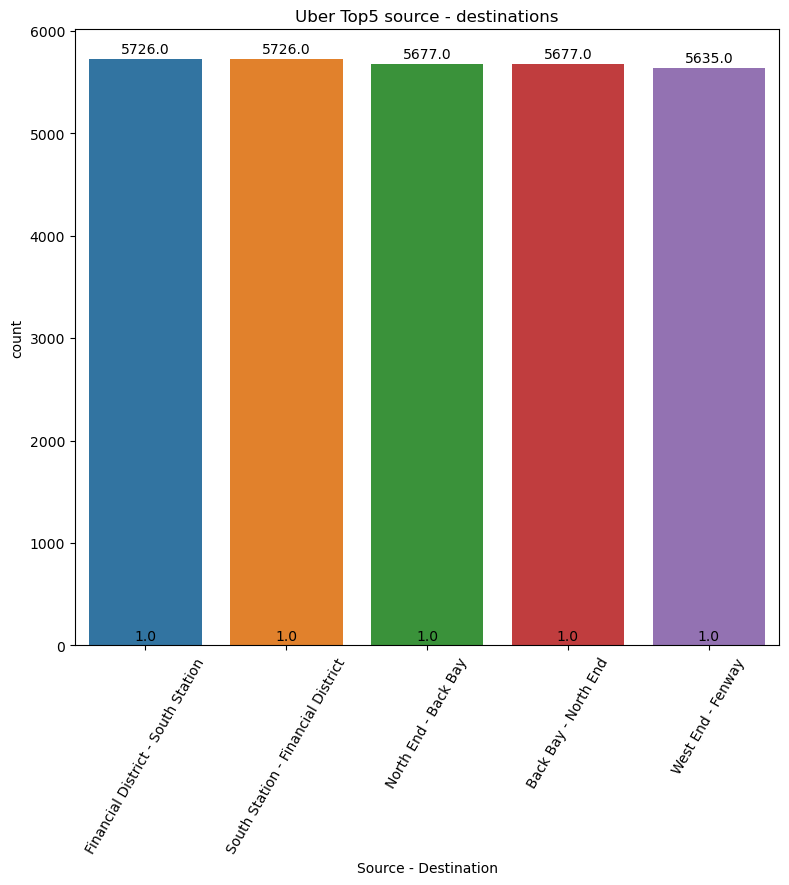

In [11]:
uber_new_data = uber_data.groupby(['source','destination']).size().reset_index()
uber_new_data.columns = ['source','destination','total']
uber_new_data.sort_values('total', ascending=False, inplace=True)
uber_top5 = uber_new_data.head(5)
uber_top5["Source - Destination"] = uber_new_data["source"].astype(str) + " - " + uber_new_data["destination"].astype(str)
uber_top5 = uber_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp = sns.barplot(x = uber_top5["Source - Destination"], y = uber_top5["total"])
bp.set_title("Uber Top5 source - destinations")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

3. Apa lima data asal-tujuan teratas dan jumlah perjalanan pada Lyft?

C:\Users\hp\AppData\Local\Temp\ipykernel_5776\333912897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_top5["Source - Destination"] = lyft_new_data["source"] + " - " + lyft_new_data["destination"]


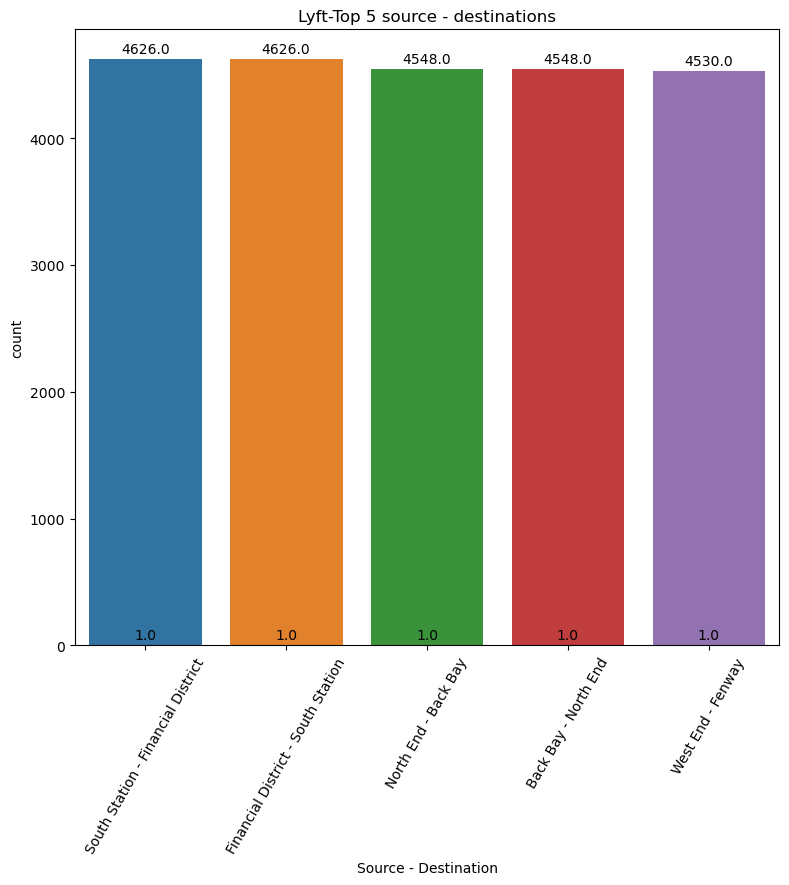

In [12]:
lyft_new_data = lyft_data.groupby(['source','destination']).size().reset_index()
lyft_new_data.columns = ['source','destination','total']
lyft_new_data.sort_values('total', ascending=False, inplace=True)
lyft_top5 = lyft_new_data.head(5)
lyft_top5["Source - Destination"] = lyft_new_data["source"] + " - " + lyft_new_data["destination"]
lyft_top5 = lyft_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp =sns.barplot(data = lyft_top5, x = "Source - Destination", y = "total")
bp.set_title("Lyft-Top 5 source - destinations")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

## 2.2 Uber Data Exploration

In [13]:
df = eda_df

#Ambil data uber dan hapus kolom cab_type, source, destination
uber = df[df['cab_type']=='Uber'].reset_index(drop=True)
uber = uber.drop(columns=['cab_type','source','destination'], axis=1)
uber.head()

,product_id,name,price,distance,surge_multiplier,latitude,short_summary
0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,42.3647,Overcast
1,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,1.11,1.0,42.3647,Clear
2,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.11,1.0,42.3647,Mostly Cloudy
3,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,1.11,1.0,42.3647,Light Rain
4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.11,1.0,42.3647,Overcast


In [14]:
#cek describe data
uber.describe().T

,count,mean,std,min,25%,50%,75%,max
price,330568.0,15.795343,8.560300,4.5000,9.0000,12.5000,21.5000,89.5000
distance,385663.0,2.191386,1.178973,0.0200,1.3000,2.1700,2.8400,7.8600
surge_multiplier,385663.0,1.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
latitude,385663.0,42.338014,0.048001,42.2148,42.3503,42.3519,42.3647,42.3661


In [15]:
#Ambil data uber yang bertipe object
uber_cat = uber.select_dtypes('object')
uber_cat.head()

,product_id,name,short_summary
0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast
1,6c84fd89-3f11-4782-9b50-97c468b19529,Black,Clear
2,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Mostly Cloudy
3,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,Light Rain
4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Overcast


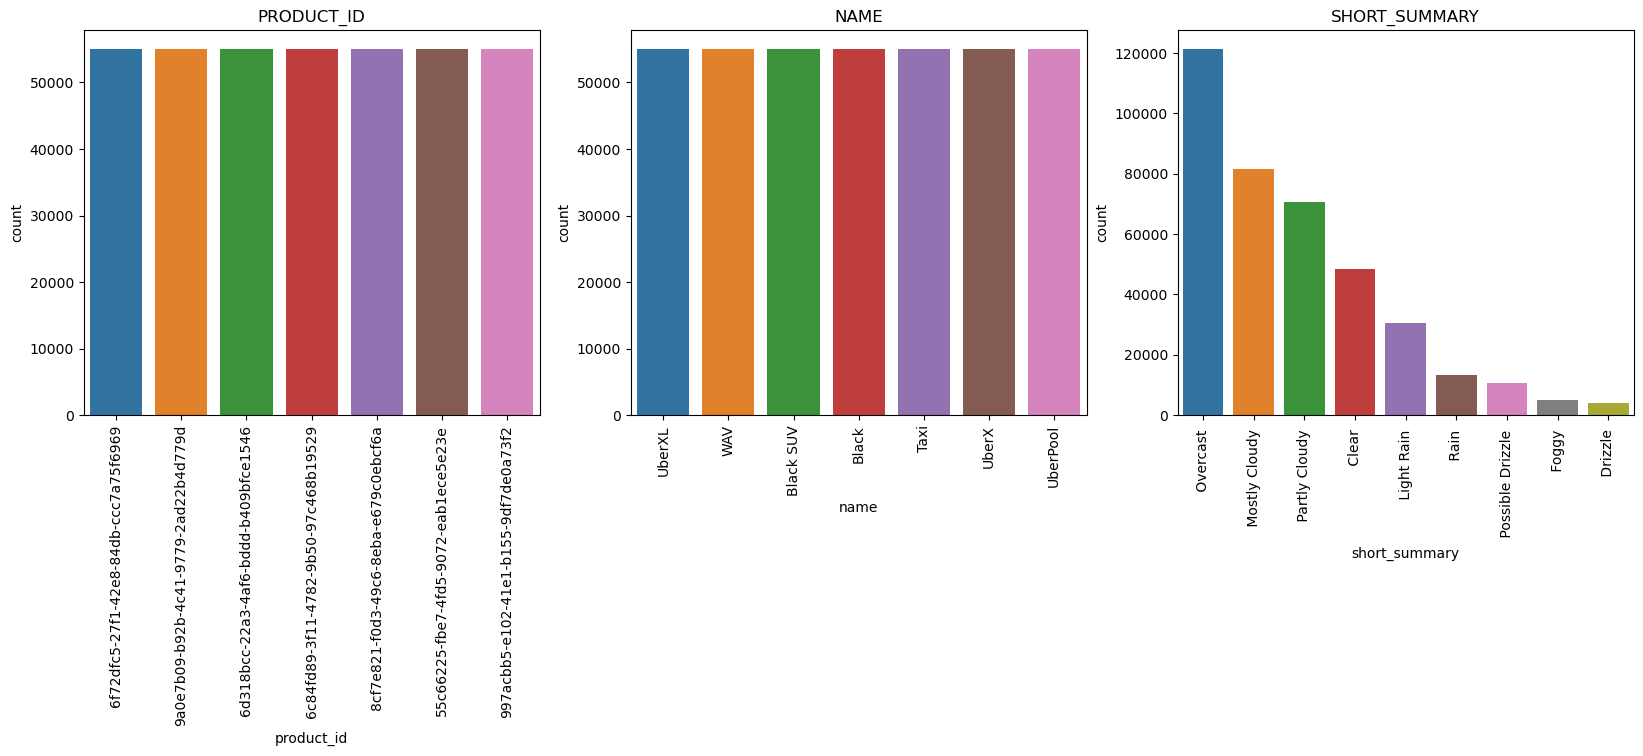

In [16]:
#buat visualisasi data kategorikal uber_cat
row,kol,i = 1,3,1
plt.figure(figsize=(20,5))
for col in uber_cat.columns:
    plt.subplot(row,kol,i)
    plt.title(col.upper(), fontsize = 12)
    sns.countplot(x=col, data=uber, order=uber[col].value_counts().index)
    plt.xticks(rotation = 90)
    i +=1
plt.show()

transaksi berdasarkan nama cab pada uber memiliki jumlah yang merata yaitu diatas nilai 50000, melalui visualisasi diagram diatas berdasarkan fitur short_summary jumlah transaksi tertinggi terjadi pada hari ketika mendung dengan jumlah diperkirakan lebih dari 100000 data dan transaksi terendah pada hari ketika mengalami grimis dengan jumalah data kurang dari 20000.

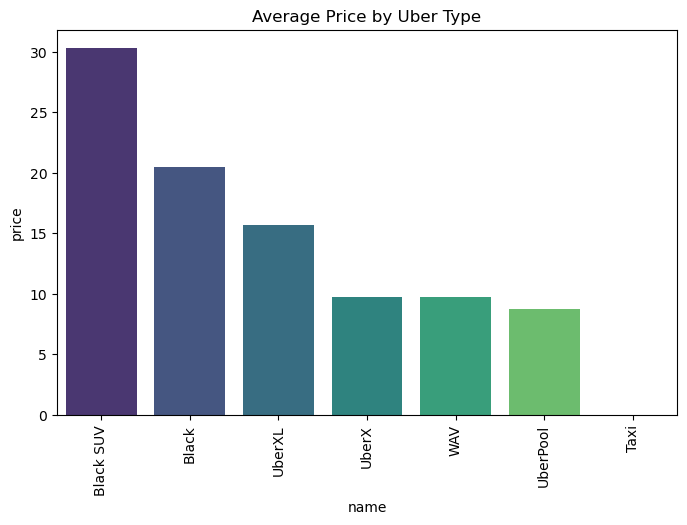

In [17]:
level_price = uber.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (8,5))
sns.barplot(x = level_price.index, y = level_price["price"], order = level_price.sort_values("price", ascending = False).index, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Average Price by Uber Type")
plt.show()

Dapat dilihat bahwa harga tertinggi pada cab jenis uber yaitu Black SUV dan level harga terendah adalah UberPool

## 2.3 Lyft Data Exploration

In [18]:
#Ambil data lyft dan hapus kolom cab_type, source, destination
lyft = df[df['cab_type']=='Lyft'].reset_index(drop=True)
lyft = lyft.drop(columns=['cab_type','source','destination'], axis=1)
lyft.head()

,product_id,name,price,distance,surge_multiplier,latitude,short_summary
0,lyft_line,Shared,5.0,0.44,1.0,42.2148,Mostly Cloudy
1,lyft_premier,Lux,11.0,0.44,1.0,42.2148,Rain
2,lyft,Lyft,7.0,0.44,1.0,42.2148,Clear
3,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,Clear
4,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,Partly Cloudy


In [19]:
#cek describe data
lyft.describe().T

,count,mean,std,min,25%,50%,75%,max
price,307408.0,17.351396,10.019171,2.5000,9.0000,16.5000,22.5000,97.5000
distance,307408.0,2.186976,1.086622,0.3900,1.2700,2.1400,2.9700,6.3300
surge_multiplier,307408.0,1.031270,0.135610,1.0000,1.0000,1.0000,1.0000,3.0000
latitude,307408.0,42.338371,0.047636,42.2148,42.3503,42.3519,42.3647,42.3661


In [20]:
#Ambil data lyft yang bertipe object ('name' dan 'short_summary')
lyft_cat = lyft.select_dtypes('object')
lyft_cat.head()

,product_id,name,short_summary
0,lyft_line,Shared,Mostly Cloudy
1,lyft_premier,Lux,Rain
2,lyft,Lyft,Clear
3,lyft_luxsuv,Lux Black XL,Clear
4,lyft_plus,Lyft XL,Partly Cloudy


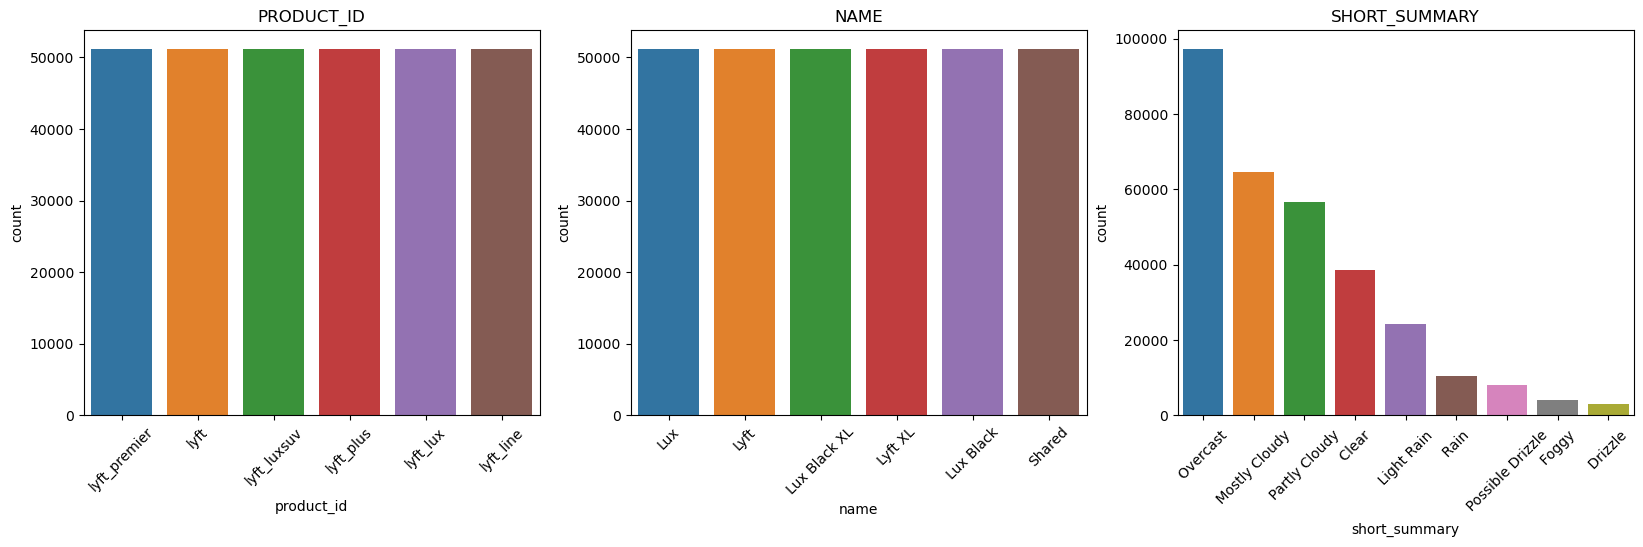

In [21]:
row,kol,i = 1,3,1
plt.figure(figsize=(20,5))
for col in lyft_cat.columns:
    plt.subplot(row,kol,i)
    plt.title(col.upper(), fontsize = 12)
    sns.countplot(x=col, data=lyft, order=lyft[col].value_counts().index)
    plt.xticks(rotation = 45)
    i +=1
plt.show()

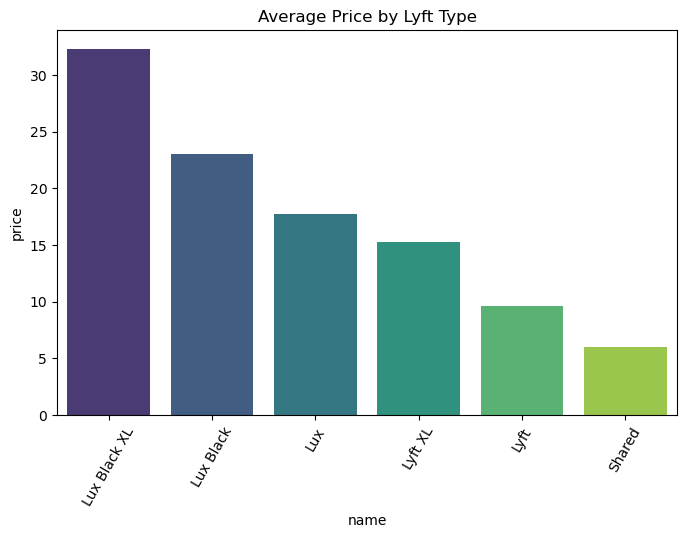

In [22]:
level_price = lyft.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (8,5))
sns.barplot(x = level_price.index, y = level_price["price"], order = level_price.sort_values("price", ascending = False).index, palette = "viridis")

plt.xticks(rotation = 60)
plt.title("Average Price by Lyft Type")
plt.show()

Diagram bar diatas menunjukkan bahwa cab jenis Lyft dengan nama Lux Black XL memiliki level harga tertinggi dengan nilai diatas 30 sedangkan level harga terendah yaitu cab jenis Lyft Shared.

# **3. Data Preprocessing**

## 3.1 Data Cleaning

In [23]:
#cek nilai missing value
rideshare_df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat nilai missing value sebanyak 55095 pada kolom price. Dikarenakan fitur price merupakan variable dependent pada projek ini, jika memaksa mengisi missing value pada fitur price akan mengakibatkan lebih banyak nilai yang error dan akurasi yang kurang. Maka missing value tersebut akan dihapus.

In [24]:
# hapus missing value
df_rideshare = rideshare_df.dropna(subset=['price']).reset_index()

In [25]:
df_rideshare.duplicated().sum()

0

Hapus fitur yang tidak memiliki dependency terhadap predictand (price) dan karena sudah ada atribut jarak dan parameter waktu (hours, day, month). Maka beberapa atribut yang berhubungan dengan hal tersebut akan dihapus.

## 3.2 Cek Data Categorical & Unique Values 

In [26]:
#category data
data_cat = df_rideshare.select_dtypes(include=['object','category']).columns.tolist()
categorical_data = df_rideshare[data_cat]
categorical_data.head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [27]:
#cek unique value
for col in categorical_data.columns:
    print('Unique value: ', col)
    print('-'*25)
    print(categorical_data[col].unique())
    print('-'*25)

Unique value:  id
-------------------------
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
-------------------------
Unique value:  datetime
-------------------------
['12/16/2018 9:30' '11/27/2018 2:00' '11/28/2018 1:00' ...
 '12/4/2018 6:37' '12/3/2018 8:37' '11/29/2018 4:55']
-------------------------
Unique value:  timezone
-------------------------
['America/New_York']
-------------------------
Unique value:  source
-------------------------
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
-------------------------
Unique value:  destination
-------------------------
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 

Karena kolom 'timezone' hanya memuat 'America/New_York' sebagai unique value, kolom tersebut dapat dihapus. Sementara itu, kolom 'id' dan 'datetime' juga akan dihapus karena akan pasti bernilai unik dan time sudah diwakili oleh kolom 'hour', 'day' dan 'month'.

In [28]:
df_rideshare = df_rideshare.drop(['timezone', 'id', 'datetime'], axis=1)

In [29]:
#Encoding semua kolom bertipe cateogory dengan onehot encoder
cat_cols = df_rideshare.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [30]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in cat_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df_rideshare[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df_rideshare = df_rideshare.drop(col, axis=1)
        df_rideshare = pd.concat([df_rideshare, encoder_df], axis=1)

In [31]:
df_rideshare.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42

## 3.3 Hapus Data Tidak Berkaitan

### 3.3.1 Analisis Korelasi Bag. 1

In [32]:
df_fix = df_rideshare

# Analisis korelasi 1
new_rideshare = df_fix[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]

#cek data
new_rideshare.head().T

,0,1,2,3,4
price,5.000000e+00,1.100000e+01,7.000000e+00,2.600000e+01,9.000000e+00
temperature,4.234000e+01,4.358000e+01,3.833000e+01,3.438000e+01,3.744000e+01
apparentTemperature,3.712000e+01,3.735000e+01,3.293000e+01,2.963000e+01,3.088000e+01
temperatureHigh,4.368000e+01,4.730000e+01,4.755000e+01,4.503000e+01,4.218000e+01
temperatureLow,3.419000e+01,4.210000e+01,3.310000e+01,2.890000e+01,3.671000e+01
apparentTemperatureHigh,3.795000e+01,4.392000e+01,4.412000e+01,3.853000e+01,3.575000e+01
apparentTemperatureLow,2.739000e+01,3.620000e+01,2.911000e+01,2.620000e+01,3.029000e+01
temperatureMin,3.989000e+01,4.049000e+01,3.536000e+01,3.467000e+01,3.310000e+01
temperatureHighTime,1.544969e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09
temperatureMax,4.368000e+01,4.730000e+01,4.755000e+01,4.503000e+01,4.218000e+01


<AxesSubplot:>

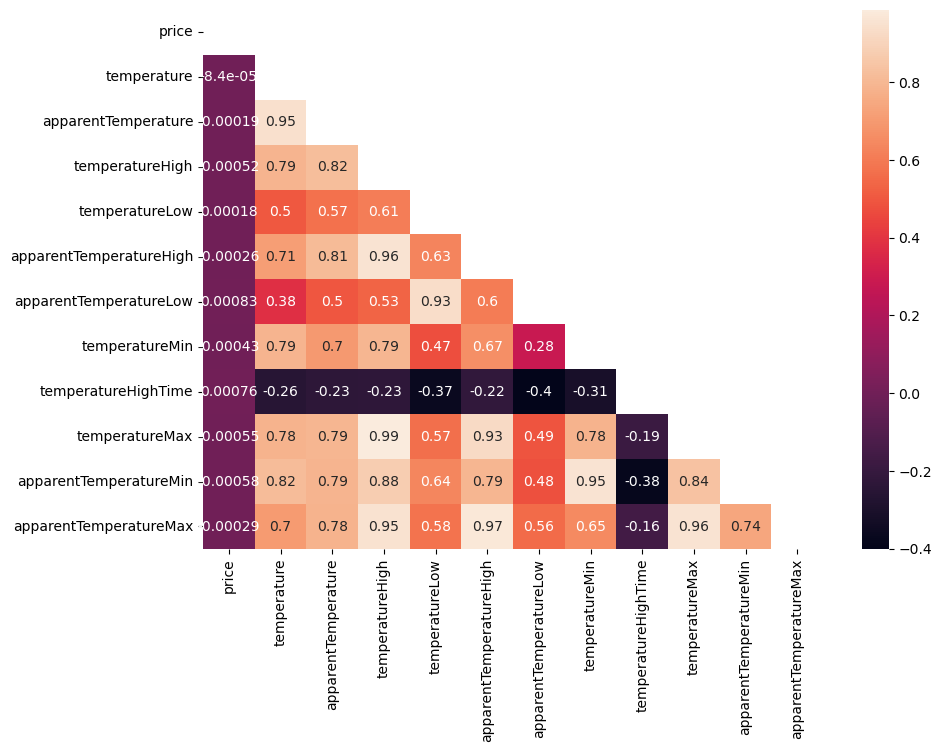

In [33]:
#visualisasi korelasi
plt.figure(figsize=(10,7))
sns.heatmap(new_rideshare.corr(), annot=True, mask=np.triu(new_rideshare.corr()))

Dari hasil visualisasi,terlihat bahwa kolom price dan kolom yang berhubungan temperatur memiliki korelasi yang lemah. Maka, kolom tersebut akan dihapus.

In [34]:
#hapus kolom yang berhubungan dengan temperature karena memiliki korelasi yang lemah dengan price
df_fix = df_fix.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax'], axis=1)

In [35]:
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,1545048000,1544968800,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,1545012000,1544968800,1545012000,1544958000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,1543298400,1543251600,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,1543233600,1543251600,1543291200,1543251600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,1543402800,1543320000,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,1543377600,1543320000,1543377600,1543320000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

### 3.3.2 Analisis Korelasi Bag. 2

In [36]:
#analisis data numerik dan cek tingkat korelasi antar variabel numerik
num_cols = ['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax',]
new_data = df_fix[num_cols]
new_data.head().T

,0,1,2,3,4
price,5.0000,11.0000,7.0000,26.00,9.0000
precipIntensity,0.0000,0.1299,0.0000,0.00,0.0000
precipProbability,0.0000,1.0000,0.0000,0.00,0.0000
humidity,0.6800,0.9400,0.7500,0.73,0.7000
windSpeed,8.6600,11.9800,7.3300,5.28,9.1400
windGust,9.1700,11.9800,7.3300,5.28,9.1400
visibility,10.0000,4.7860,10.0000,10.00,10.0000
dewPoint,32.7000,41.8300,31.1000,26.64,28.6100
pressure,1021.9800,1003.9700,992.2800,1013.73,998.3600
windBearing,57.0000,90.0000,240.0000,310.00,303.0000


<AxesSubplot:>

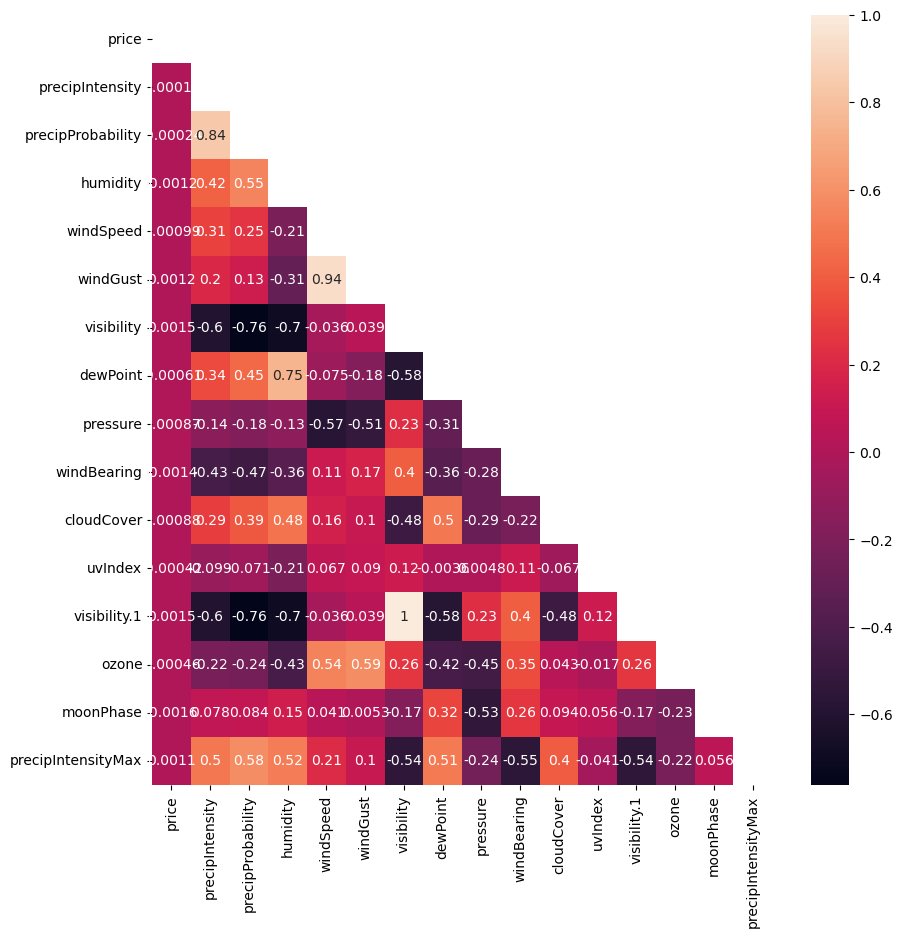

In [37]:
# visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

Semua fitur yang berhubungan dengan cuaca memiliki korelasi yang rendah terhadap kolom price. drop kolom kolom tersebut

In [38]:
# drop column 
num_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df_fix = df_fix.drop(num_cols, axis=1)

# cek data
df_fix.head().T

,0,1,2,3,4
index,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
timestamp,1.544953e+09,1.543284e+09,1.543367e+09,1.543554e+09,1.543463e+09
hour,9.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+00
day,1.600000e+01,2.700000e+01,2.800000e+01,3.000000e+01,2.900000e+01
month,1.200000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
...,...,...,...,...,...
icon_ cloudy,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icon_ fog,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icon_ partly-cloudy-day,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icon_ partly-cloudy-night,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


### 3.3.3 Analisis Korelasi Bag. 3

In [39]:
# analisis data dan cek tingkat korelasi
num_cols = ['price','apparentTemperatureMaxTime','apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime','uvIndexTime',
               'sunsetTime','sunriseTime','apparentTemperatureLowTime','apparentTemperatureHighTime','temperatureLowTime', 'windGustTime']
new_data = df_fix[num_cols]
new_data.head().T

,0,1,2,3,4
price,5.000000e+00,1.100000e+01,7.000000e+00,2.600000e+01,9.000000e+00
apparentTemperatureMaxTime,1.544958e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09
apparentTemperatureMinTime,1.545012e+09,1.543291e+09,1.543378e+09,1.543550e+09,1.543392e+09
temperatureMaxTime,1.544969e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09
temperatureMinTime,1.545012e+09,1.543234e+09,1.543378e+09,1.543550e+09,1.543403e+09
uvIndexTime,1.544980e+09,1.543252e+09,1.543338e+09,1.543507e+09,1.543421e+09
sunsetTime,1.544995e+09,1.543267e+09,1.543353e+09,1.543526e+09,1.543440e+09
sunriseTime,1.544962e+09,1.543233e+09,1.543319e+09,1.543492e+09,1.543406e+09
apparentTemperatureLowTime,1.545044e+09,1.543291e+09,1.543392e+09,1.543576e+09,1.543460e+09
apparentTemperatureHighTime,1.544969e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09


<AxesSubplot:>

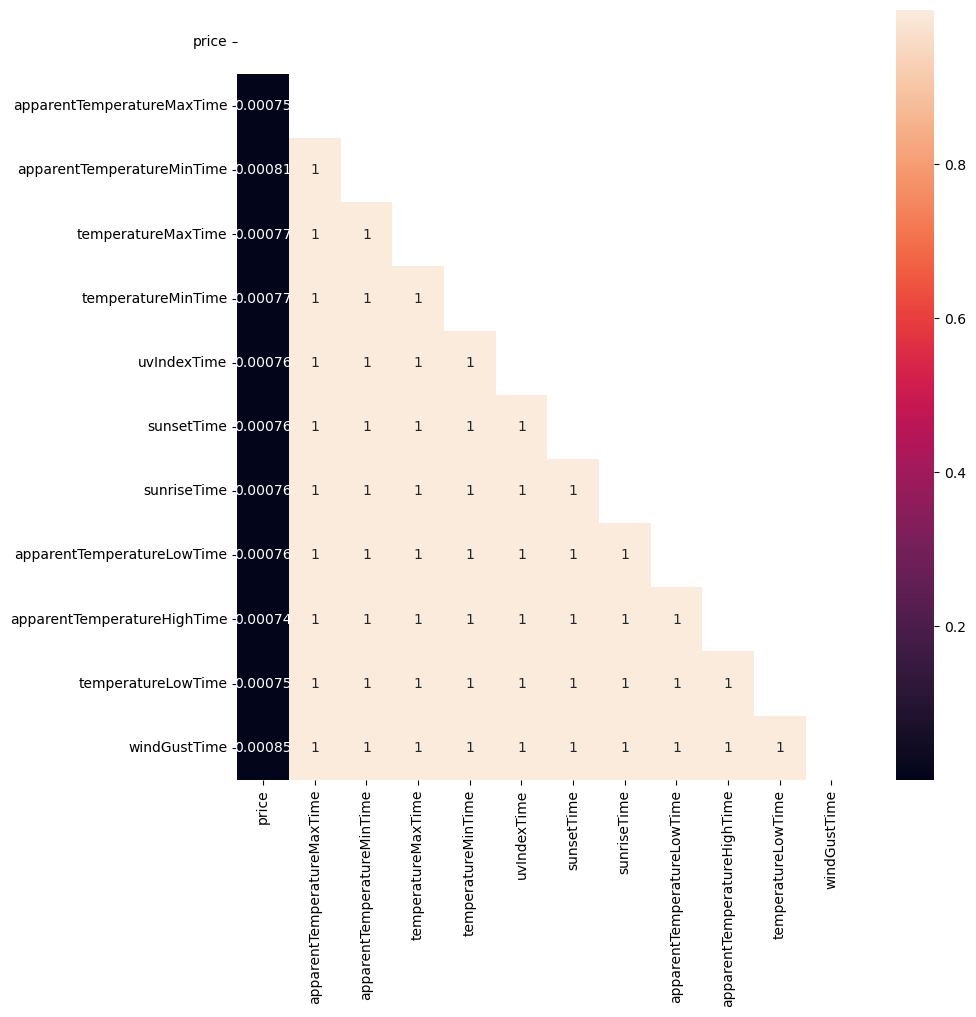

In [40]:
# visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

In [41]:
num_cols = ['apparentTemperatureMaxTime','apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime','uvIndexTime',
               'sunsetTime','sunriseTime','apparentTemperatureLowTime','apparentTemperatureHighTime','temperatureLowTime', 'windGustTime']
df_fix = df_fix.drop(num_cols, axis=1)

In [42]:
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3.3.4 Analisis Korelasi Bag. 4

In [43]:
# analisis dan cek korelasi antara price dengan kolom yang berhubungan dengan source
source_cols = [col for col in df_fix.columns if 'source' in col]

#membuat dataframe baru yang berisi kolom source dan price
df_source = df_fix[['price'] + source_cols]
df_source.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

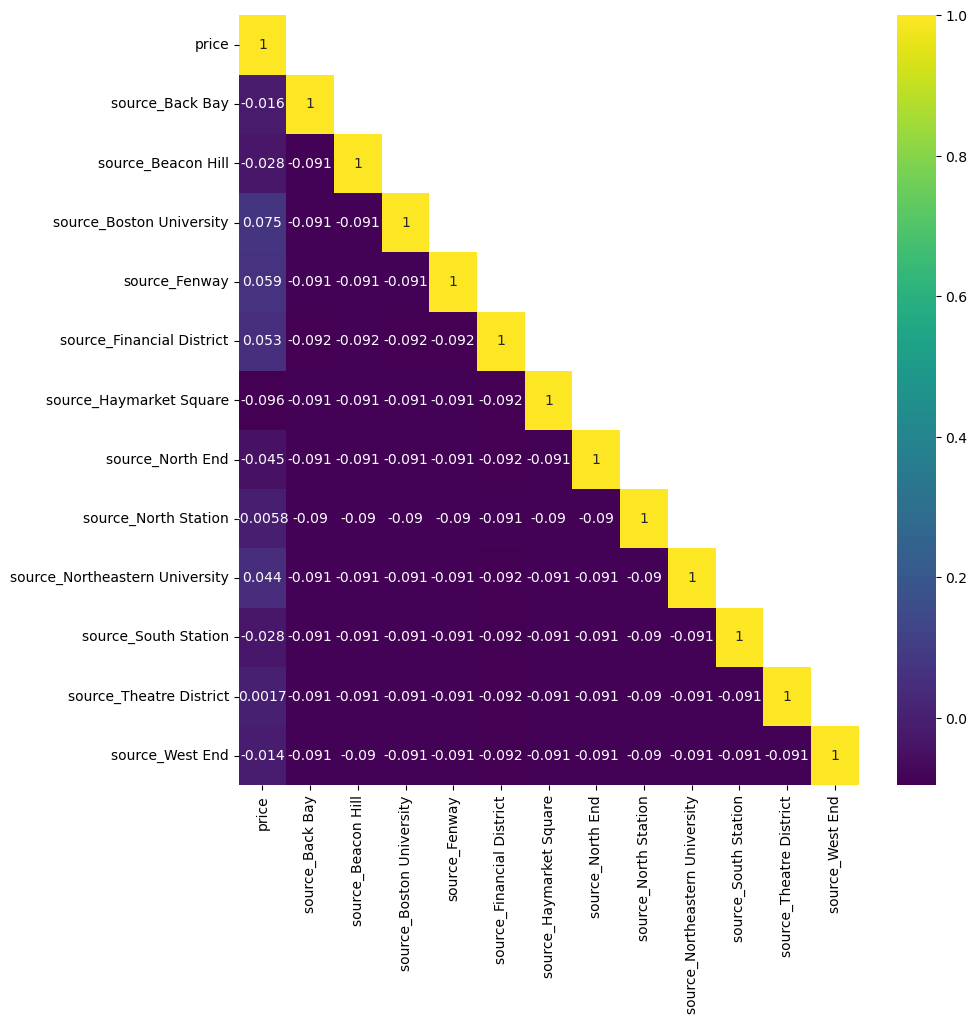

In [44]:
#membuat visualisasi korelasi antara price dengan kolom yang berhubungan dengan source
plt.figure(figsize=(10,10))
sns.heatmap(df_source.corr(), annot=True, cmap='viridis', mask=np.triu(df_source.corr(), k=1))

In [45]:
#cek korelasi antara price dengan kolom yang berhubungan dengan destination
destination_cols = [col for col in df_fix.columns if 'destination' in col]

#membuat dataframe baru yang berisi kolom destination dan price
df_destination = df_fix[['price'] + destination_cols]
df_destination.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

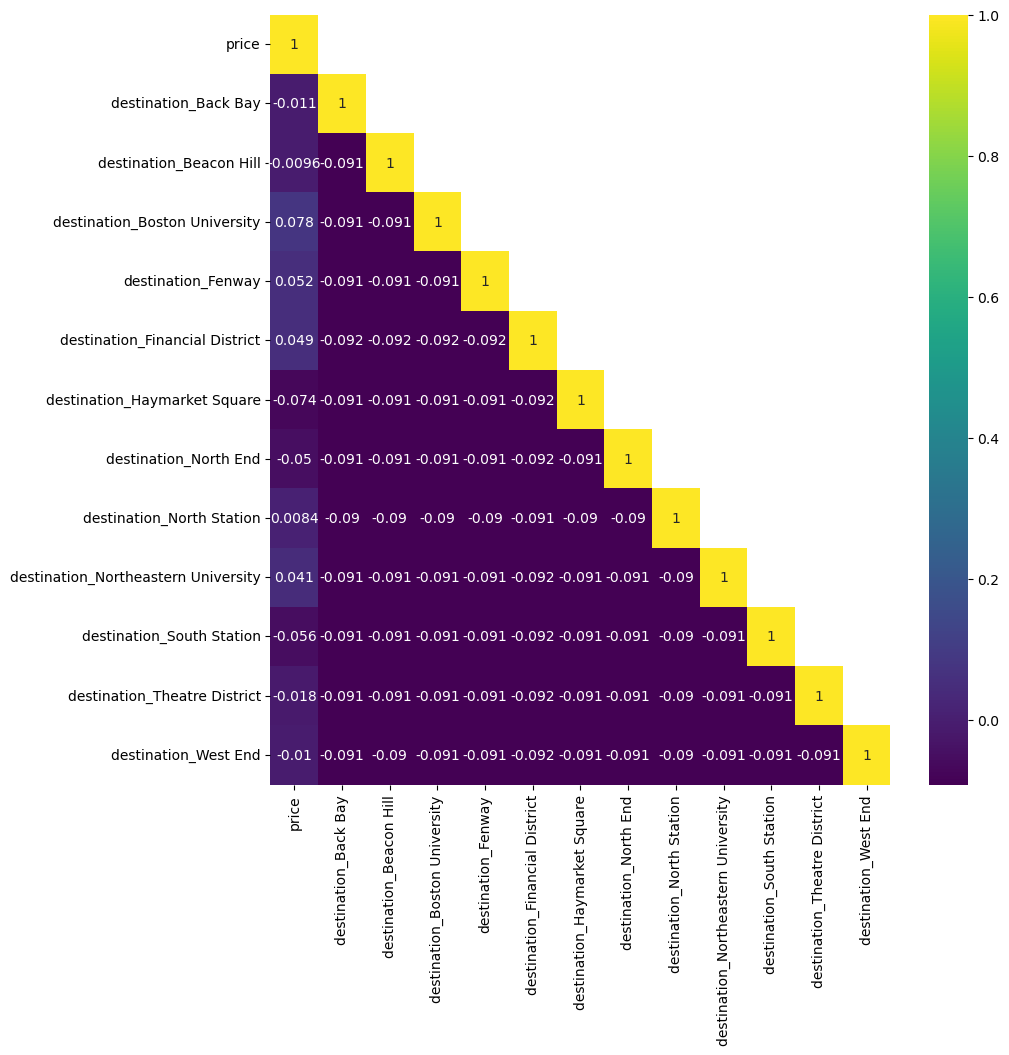

In [46]:
#membuat visualisasi korelasi antara price dengan kolom yang berhubungan dengan destination
plt.figure(figsize=(10,10))
sns.heatmap(df_destination.corr(), annot=True, cmap='viridis', mask=np.triu(df_destination.corr(), k=1))

In [47]:
#hapus kolom source dan destination
df_fix = df_fix.drop(columns=['source_Back Bay','source_Beacon Hill', 'source_Boston University', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End','destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End'], axis=1)

#cek dataframe
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3.3.5 Analisis Korelasi Bag. 5

In [48]:
#cek korelasi antara summary dengan price
summary_cols = [col for col in df_fix.columns if 'short_summary' in col]

#membuat dataframe baru yang berisi kolom summary dan price
df_summary = df_fix[['price'] + summary_cols]

#cek data
df_summary.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

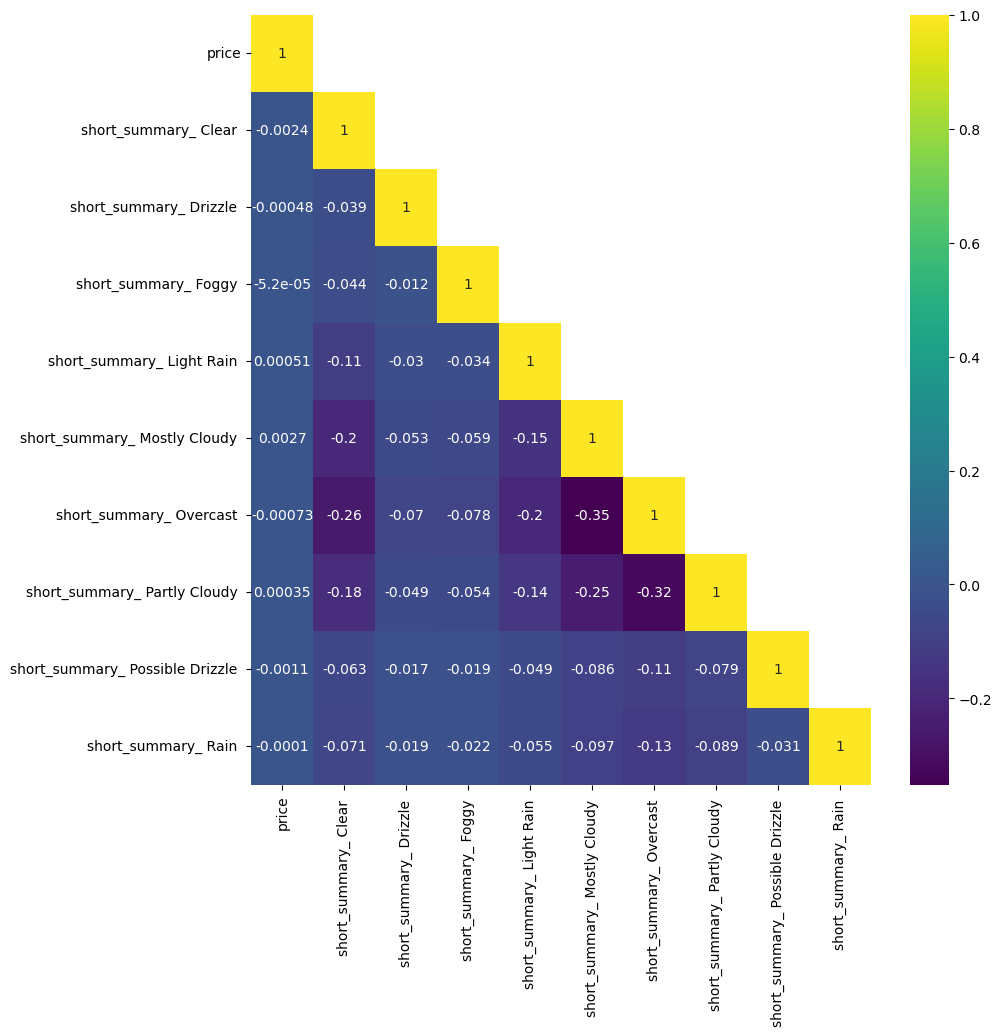

In [49]:
#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_summary.corr(), annot=True, cmap='viridis', mask=np.triu(df_summary.corr(), k=1))

In [50]:
#cek korealsi antara kolom icon dan price
icon_cols = [col for col in df_fix.columns if 'icon' in col]

#membuat dataframe baru yang berisi kolom icon dan price
df_icon = df_fix[['price'] + icon_cols]

#cek data
df_icon.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

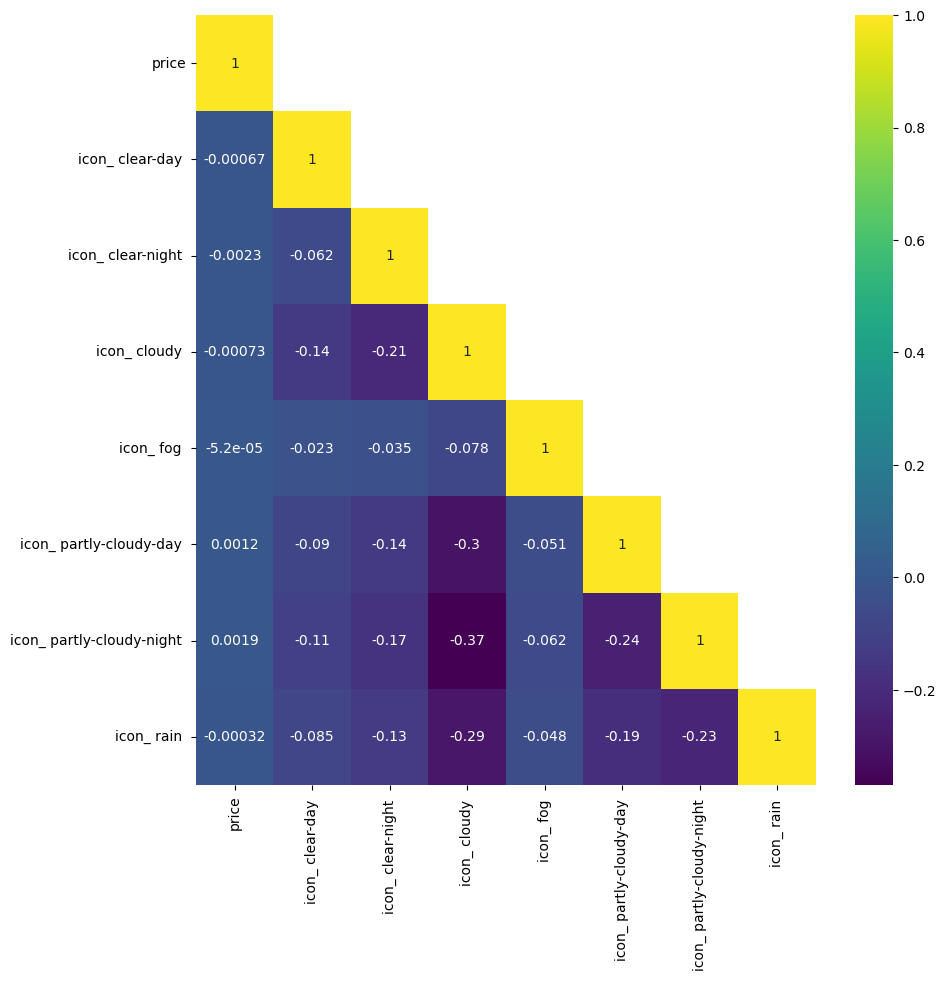

In [51]:
#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_icon.corr(), annot=True, cmap='viridis', mask=np.triu(df_icon.corr(), k=1))

In [52]:
#hapus kolom summary dan icon
df_fix = df_fix.drop(columns=['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
             'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
             'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
             'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ', 
             'icon_ partly-cloudy-night ','icon_ rain '], axis=1)

#cek dataframe
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening."
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.3.6 Analisis Korelasi Bag. 6

<AxesSubplot:>

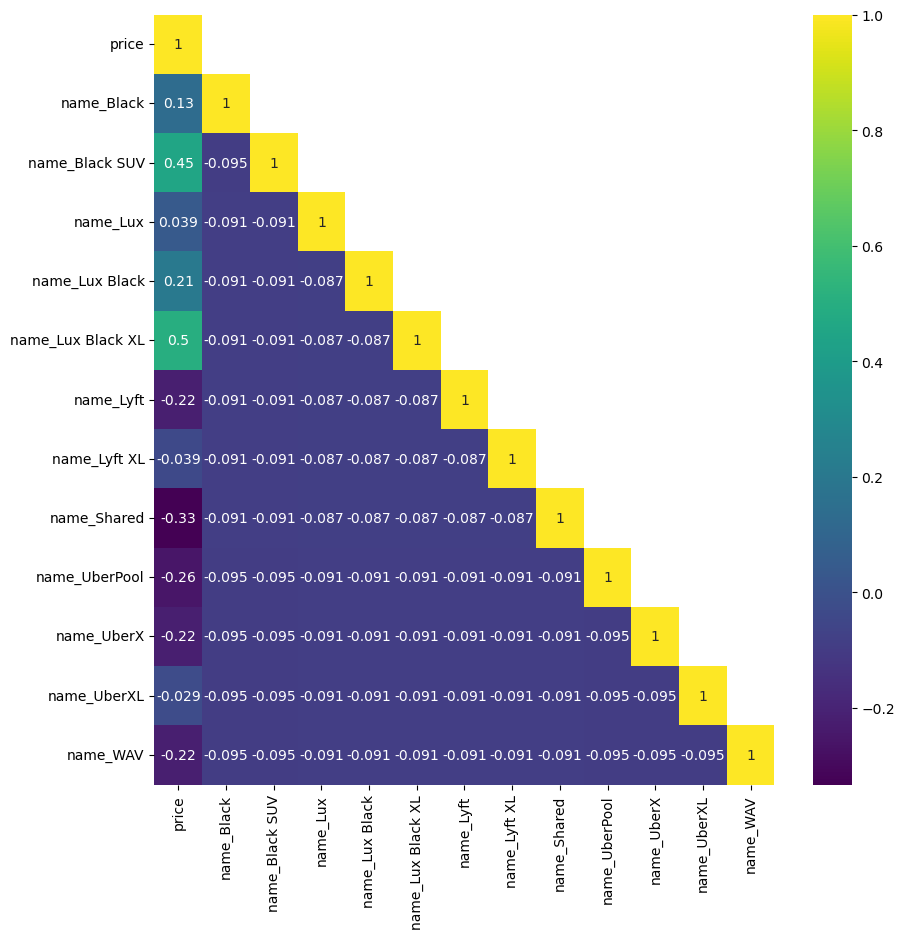

In [53]:
#cek korelasi antara price dengan kolom yang berhubungan dengan name
name_cols = [col for col in df_fix.columns if 'name' in col]

#membuat dataframe baru yang berisi kolom name dan price
df_name = df_fix[['price'] + name_cols]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_name.corr(), annot=True, cmap='viridis', mask=np.triu(df_name.corr(), k=1))

In [54]:
name_cols = ['name_Lux', 'name_Lyft XL', 'name_UberXL']
df_fix = df_fix.drop(name_cols, axis=1)

In [55]:
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening."
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

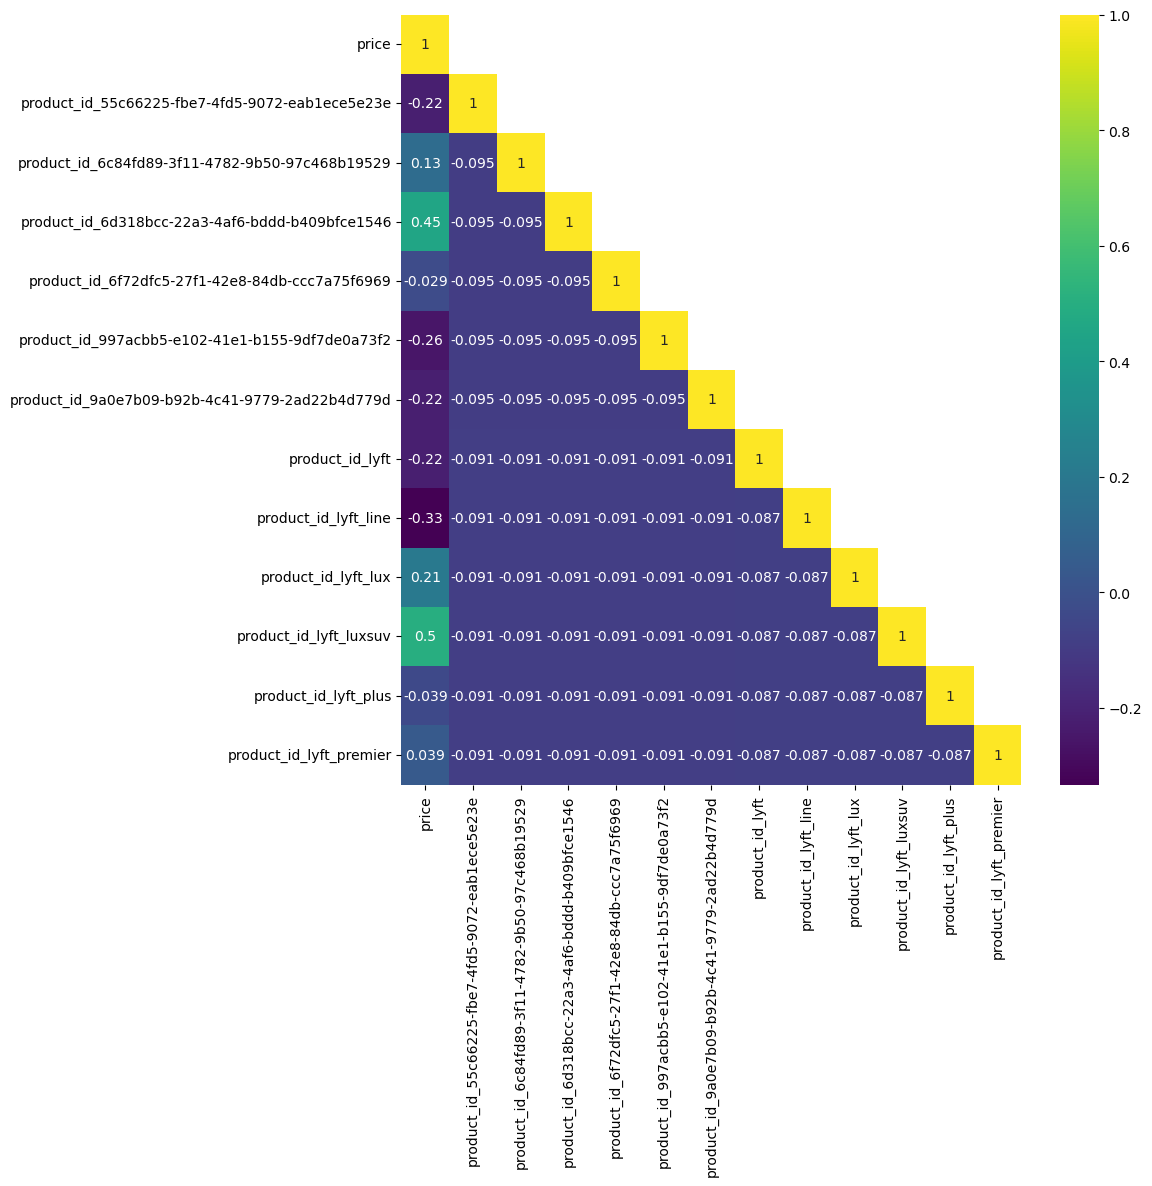

In [56]:
#cek korelasi antara price dengan kolom yang berhubungan dengan name
name_cols = [col for col in df_fix.columns if 'product_id' in col]

#membuat dataframe baru yang berisi kolom name dan price
df_name = df_fix[['price'] + name_cols]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_name.corr(), annot=True, cmap='viridis', mask=np.triu(df_name.corr(), k=1))

In [57]:
name_cols = ['product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e', 
             'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969', 
             'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2', 
             'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d', 
             'product_id_lyft', 'product_id_lyft_line', 'product_id_lyft_plus']
df_fix = df_fix.drop(name_cols, axis=1)

In [58]:
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening."
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

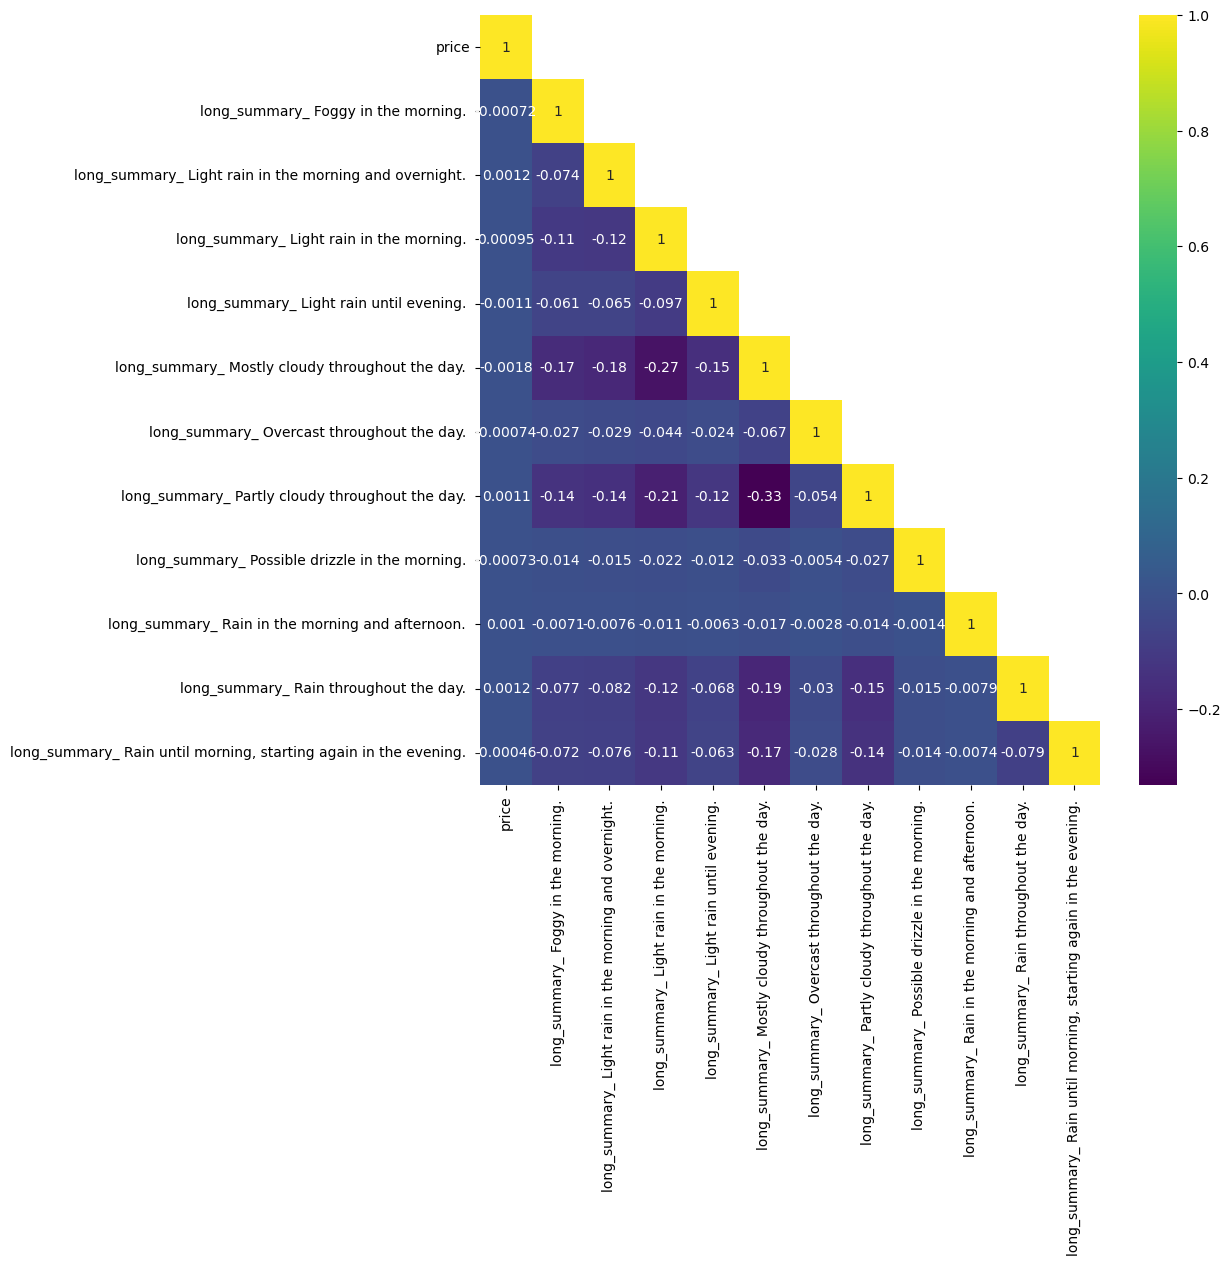

In [59]:
#cek korelasi antara price dengan kolom yang berhubungan dengan name
name_cols = [col for col in df_fix.columns if 'long_summary' in col]

#membuat dataframe baru yang berisi kolom name dan price
df_name = df_fix[['price'] + name_cols]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_name.corr(), annot=True, cmap='viridis', mask=np.triu(df_name.corr(), k=1))

In [60]:
df_fix = df_fix.drop(name_cols, axis=1)

In [61]:
df_fix.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.3.7 Analisis Korelasi Bag. 7

In [62]:
# analisis data dan cek tingkat korelasi
num_cols = ['price','timestamp','hour','day','month','distance',
               'surge_multiplier','latitude','longitude']
new_data = df_fix[num_cols]
new_data.head().T

,0,1,2,3,4
price,5.000000e+00,1.100000e+01,7.000000e+00,2.600000e+01,9.000000e+00
timestamp,1.544953e+09,1.543284e+09,1.543367e+09,1.543554e+09,1.543463e+09
hour,9.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+00
day,1.600000e+01,2.700000e+01,2.800000e+01,3.000000e+01,2.900000e+01
month,1.200000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
distance,4.400000e-01,4.400000e-01,4.400000e-01,4.400000e-01,4.400000e-01
surge_multiplier,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
latitude,4.221480e+01,4.221480e+01,4.221480e+01,4.221480e+01,4.221480e+01
longitude,-7.103300e+01,-7.103300e+01,-7.103300e+01,-7.103300e+01,-7.103300e+01


<AxesSubplot:>

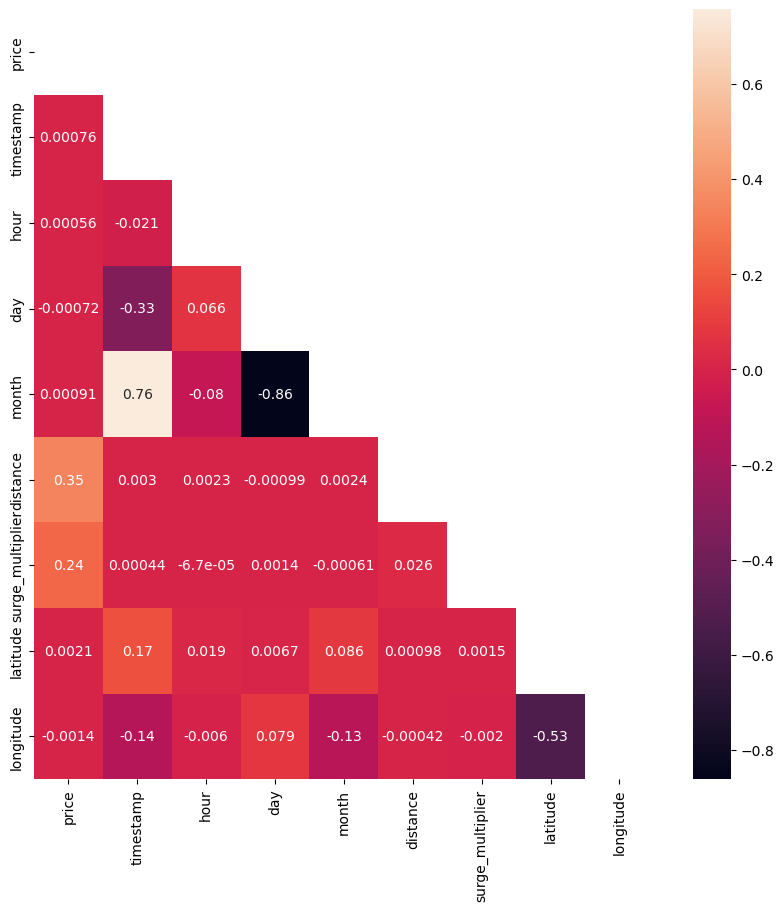

In [63]:
# visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

In [64]:
# hapus kolom yang tidak memiliki korelasi lebih atau sama dengan dari 0.01
num_cols = ['timestamp', 'month', 'day', 'hour', 'latitude', 'longitude']
df_fix = df_fix.drop(num_cols, axis=1)

In [65]:
df_fix.head()

,index,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.4 Cek & Hapus Outlier

In [66]:
#cnilai quartil atas dan bawah dari kolom price
Q1 = df_rideshare['price'].quantile(0.25)
Q3 = df_rideshare['price'].quantile(0.75)

#cek outlier
IQR = Q3 - Q1
IQR

13.5

<AxesSubplot:xlabel='price'>

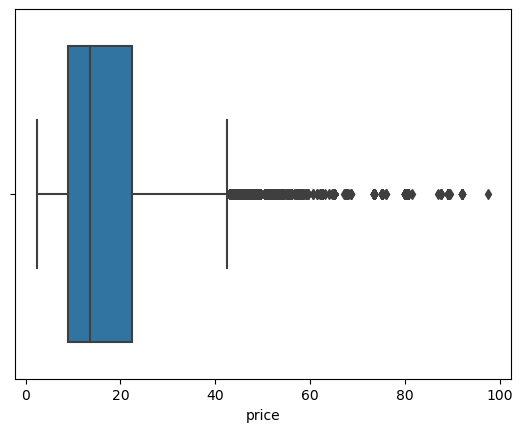

In [67]:
#cek outlier visualisasi
sns.boxplot(x=df_rideshare['price'])

In [68]:
#cek outlier
oulier = np.where((df_rideshare['price'] < (Q1 - 1.5 * IQR)) | (df_rideshare['price'] > (Q3 + 1.5 * IQR)))
print(oulier)
print(np.count_nonzero(oulier))

(array([   645,    646,    706, ..., 637813, 637878, 637917], dtype=int64),)
5589


In [69]:
#hapus outlier
df_rideshare = df_rideshare[~((df_rideshare['price'] < (Q1 - 1.5 * IQR)) | (df_rideshare['price'] > (Q3 + 1.5 * IQR)))]
df_rideshare.shape

(632387, 124)

In [70]:
# cek data
df_rideshare.head()

,index,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0,42

## 3.5 Mengecek Skewness

distance: 0.8168484903389348


<Figure size 640x480 with 0 Axes>

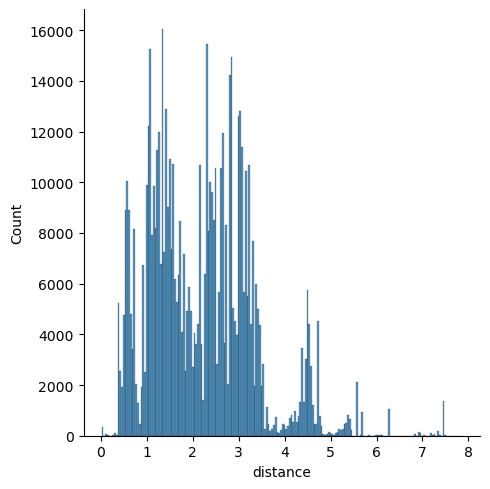

surge_multiplier: 7.969048488132256


<Figure size 640x480 with 0 Axes>

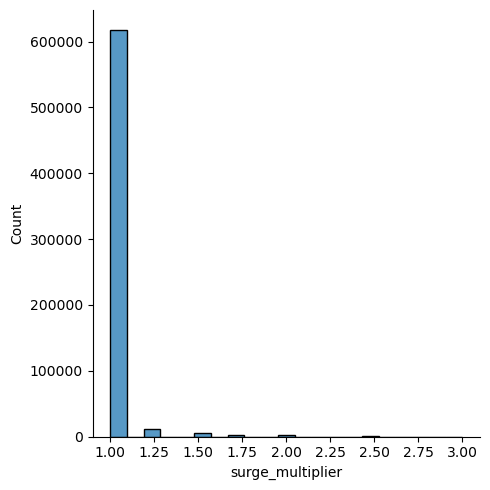

In [71]:
#  cek skewness dari distance dan surge_multiplier
columns = ['distance', 'surge_multiplier']
for col in columns:
    print(col + ':', df_fix[col].skew())
    plt.figure()
    sns.displot(df_fix[col])
    plt.show()

Karena skewness di kolom 'surge_multiplier' sangat besar, akan dilakukan transformasi menggunakan BoxCox. Transformasi Box-Cox merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians.

In [72]:
#transformasi dengan boxcox pada surge_multiplier
df_fix['surge_multiplier'] = stats.boxcox(df_fix['surge_multiplier'])[0]
pd.Series(df_fix['surge_multiplier']).skew()

5.239288428182275

# **4. Modelling**

## 4.1 Linear Regression

### 4.1.1 Penjelasan

Linear regression adalah salah satu teknik analisis statistik yang digunakan untuk memprediksi suatu atribut yang bersifat numerik atau kontinu. Linear regression memodelkan hubungan antara satu atau lebih variabel independen (variabel prediktor) dan sebuah variabel dependen (variabel target). Dalam kasus ini, variabel dependen dalam data set adalah 'price'

### 4.1.2 Pembuatan Model

In [73]:
X = df_fix.drop('price', axis=1)
y = df_fix['price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

In [75]:
print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (427443, 19)
Shape Testing Feature: (210533, 19)
Shape Training Feature: (427443,)
Shape Testing Feature: (210533,)


In [76]:
sc = StandardScaler()
X_train_log = sc.fit_transform(X_train)
X_test_log = sc.transform(X_test)

In [77]:
model = LinearRegression().fit(X_train, y_train)

### 4.1.3 Evaluasi Model

In [78]:
y_pred = model.predict(X_test)

In [79]:
print("r2 Score :", r2_score(y_test, y_pred))
print("MAE Score :", mean_absolute_error(y_test, y_pred))
print("RMSE Score :", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 Score : 0.9183714570615275
MAE Score : 1.8262679603389376
RMSE Score : 2.659141672311938


In [80]:
print("Train accuracy :", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))

Train accuracy : 0.9183388183285568
Test accuracy : 0.9183714570615275


Text(0, 0.5, 'Predicted Y')

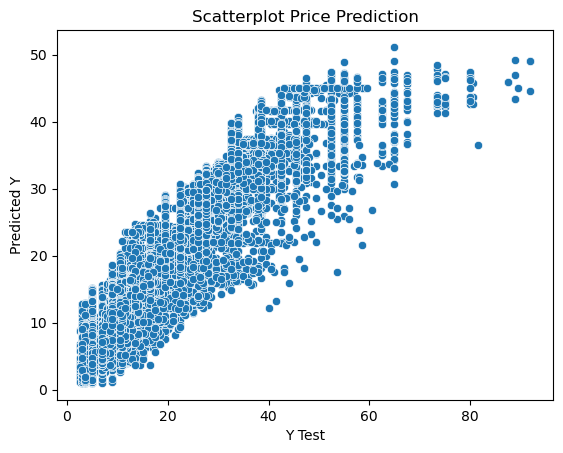

In [81]:
sns.scatterplot(x = y_test, y=y_pred, palette='deep').set_title("Scatterplot Price Prediction")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 4.1.4 Hasil Jadi Model (Dalam Bentuk Pemanggilan Fungsi)

In [82]:
df_fix.head()

,index,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,0,5.0,0.44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11.0,0.44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7.0,0.44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,26.0,0.44,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,9.0,0.44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_fix.shape

(637976, 20)

In [90]:
def predict_price(distance, surge_multiplier, cab_type=0, product_id=0, name=0):
    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    x[2] = 1 if cab_type == "Lyft" else 0
    x[3] = 1 if cab_type == "Uber" else 0
    x[4] = 1 if product_id == "6c84fd89-3f11-4782-9b50-97c468b19529" else 0
    x[5] = 1 if product_id == "6d318bcc-22a3-4af6-bddd-b409bfce1546" else 0
    x[6] = 1 if product_id == "lyft_lux" else 0
    x[7] = 1 if product_id == "lyft_luxsuv" else 0
    x[8] = 1 if product_id == "lyft_premier" else 0
    x[9] = 1 if name == "Black" else 0
    x[10] = 1 if name == "Black SUV" else 0
    x[12] = 1 if name == "Lux Black" else 0
    x[13] = 1 if name == "Lux Black XL" else 0
    x[14] = 1 if name == "Lyft" else 0
    x[15] = 1 if name == "Shared" else 0
    x[16] = 1 if name == "UberPool" else 0
    x[17] = 1 if name == "UberX" else 0
    x[18] = 1 if name == "WAV" else 0

    return model.predict([x])[0]

In [91]:
predict_price(0.44, 0, 'Uber', '6c84fd89-3f11-4782-9b50-97c468b19529', 'Taxi')

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9.022585657897725

In [92]:
predict_price(2.38, 0, 'Lyft', 'lyft_luxsuv', 'Lux')

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


730.9936235408868

# 5. Rangkuman & Kesimpulan

## 5.1 Rangkuman

Telah dilakukan EDA untuk dataset ini beserta data preprocessing yang mencakup penghapusan data null/kosong beserta pengecekan korelasi antara feature predictant yang dianggap dependen (price) dengan semua feature lainnya menggunakan heatmap. Korelasi yang memiliki nilai lebih dari 0.1 (berbanding lurus, mendekati 1) dan kurang dari -0.1 (berbanding terbalik, mendekati -1) dipertimbangkan dalam pelatihan dan peramalan model ini. Penghapusan feature/kolom dilakukan terlebih dahulu daripada pembersihan data skew karena data set ini dianggap memiliki banyak kolom yang tidak berguna berdasarkan hasil dari EDA. Pada akhirnya, dimiliki data berukuran 637976 baris dengan 15 kolom yang dibagi secara proporsional untuk digunakan dalam melatih dan mengetes data. Ditemukan model meraih akurasi 85% baik dalam training maupun testing.

## 5.2 Kesimpulan

- Model yang dihasilkan dengan metode linear regression memiliki akurasi 91.8%. Hal ini membuat model tersebut dapat menebak beberapa kasus dengan baik tetapi masih harus dilakukan penelitian atau pelatihan lebih lanjut untuk dapat digunakan dalam kasus dunia nyata.
- Terdapat beberapa ketidakakuratan karena skewness yang terdapat pada dataset sementara algoritma yang digunakan adalah linear regression yang memiliki asumsi bahwa distribusi data bersifat normal. Akan tetapi, karena sudah dilakukan operasi yang meminimalisasikan skewness, model dapat menjadi lebih kokoh/robust.
- MAE dan RMSE yang dimiliki oleh model ini masih dapat ditolerir (acceptable).
- Diperlukan data baru yang memiliki distribusi lebih normal untuk melatih lebih lanjut lagi model ini.